In [1]:
import pandas as pd
import numpy as np
import re
import unidecode
from nltk.probability import FreqDist
from nltk.corpus import stopwords as swords
from stop_words import get_stop_words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pickle
import stanza
import spacy_stanza
import itertools
import nltk
from nltk.stem import SnowballStemmer
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import json
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
df = pd.read_csv("preprocessed.csv")
df = df.dropna(subset=['t6_stemming'])
df.shape

C:\Users\saox\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(108577, 22)

In [ ]:
df.head()

In [ ]:
# pd.set_option('display.max_colwidth', None)
# test = df[df['t6_stemming'].str.contains("pedrosounidadreparacion", na=False)].head()[['content_coalesce','t6_stemming']]
# test

In [ ]:
# test[~test['t6_stemming'].str.contains("fiscalia",na=False)].head()[['content_coalesce','t6_stemming']].iloc[0]

In [ ]:
df.shape

In [ ]:
df['t6_stemming'].head()

# Get word frequency

In [11]:
a = df.t6_stemming.str.lower().str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)
print(word_dist)
top = []
#top = word_dist.most_common(10000)#[-1000:]
word_freq = pd.DataFrame({'Words':list(word_dist.keys()),'Freq':list(word_dist.values())})

<FreqDist with 282788 samples and 28359496 outcomes>


In [12]:
word_freq = word_freq.sort_values('Freq',ascending=False)

In [19]:
word_freq.tail()

,Words,Freq
145321,paisespresent,1
145322,embajadoresacredit,1
145324,estuvieronrepresent,1
145325,delegacionencabez,1
282787,afrend,1


In [8]:
word_freq.shape

(282788, 2)

In [ ]:
word_freq[word_freq.Freq>2000].shape

In [9]:
word_freq[word_freq.Freq<10].shape

(236935, 2)

In [10]:
final_words = word_freq[(word_freq.Freq >500) & (word_freq.Freq < 50000)]
remove_words = word_freq[(word_freq.Freq <=500) | (word_freq.Freq >= 50000)]
final_words.shape

(4483, 2)

In [11]:
final_words.sample(10).Words.tolist()

['tendent',
 'subdirector',
 'octubreoficin',
 'murall',
 'asociacion',
 'educacion',
 'camarer',
 'papel',
 'munum',
 'aemps']

In [12]:
remove_words.sample(10)

,Words,Freq
254592,ysom,1
20447,asociacionesprofesional,15
26610,acreedoresaquell,1
128146,satcom,1
49199,inmediacion,10
55569,muestran_su,1
136215,rpdriguez,1
278307,senadosenal,1
145605,lacompostel,1
237393,tenerifesegoviasevillasoriatarragonaterueltole...,1


# Per class

In [96]:
df.tagged.head()

0    True
1    True
2    True
3    True
4    True
Name: tagged, dtype: bool

In [10]:
dict(df.topics.value_counts()) # matrix encode

{'[]': 60040,
 "['ODS 3 Salud y bienestar']": 7542,
 "['ODS 9 Industria, innovación e infraestructura']": 6400,
 "['ODS 10 Reducción de las desigualdades']": 3896,
 "['ODS 4 Educación de calidad']": 2429,
 "['ODS 16 Paz, justicia e instituciones sólidas']": 2216,
 "['ODS 8 Trabajo decente y crecimiento económico']": 1533,
 "['ODS 1 Fin de la pobreza']": 878,
 "['ODS 16 Paz, justicia e instituciones sólidas', 'ODS 8 Trabajo decente y crecimiento económico']": 814,
 "['ODS 1 Fin de la pobreza', 'ODS 10 Reducción de las desigualdades']": 784,
 "['ODS 16 Paz, justicia e instituciones sólidas', 'ODS 5 Igualdad de género']": 773,
 "['ODS 10 Reducción de las desigualdades', 'ODS 16 Paz, justicia e instituciones sólidas', 'ODS 5 Igualdad de género']": 707,
 "['ODS 3 Salud y bienestar', 'ODS 9 Industria, innovación e infraestructura']": 703,
 "['ODS 10 Reducción de las desigualdades', 'ODS 3 Salud y bienestar']": 661,
 "['ODS 11 Ciudades y comunidades sostenibles']": 656,
 "['ODS 6 Agua limpia 

In [119]:
wordcloud2 = WordCloud().generate(' '.join(df[df.initiative_type_alt=="Proposición no de Ley en Comisión"]['t6_stemming']))

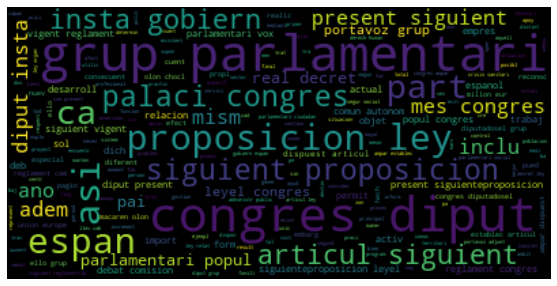

In [120]:
plt.figure(figsize=(12,5))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

# Vectorize

In [28]:
vectorizer = CountVectorizer(min_df = 0.05, max_df = 0.9)
X = vectorizer.fit_transform(df['t6_stemming'])

In [32]:
X.shape

(108577, 542)